## 🔧 Implementation: KNN Regression on California Housing Dataset

Mean Squared Error: 0.4324216146043236
R² Score: 0.6700101862970989


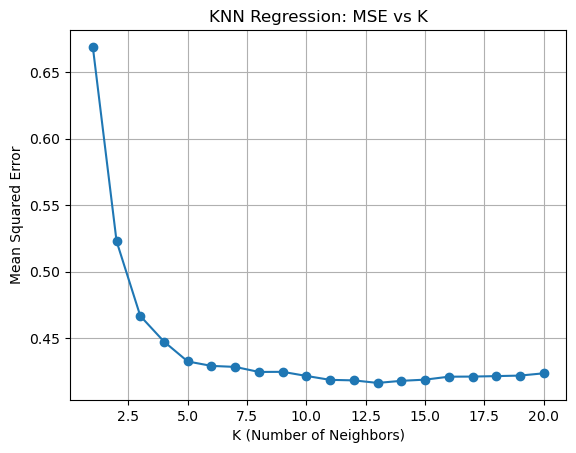

In [8]:
# ## 🔧 Implementation: KNN Regression on California Housing Dataset

from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Regressor
reg_model = KNeighborsRegressor(n_neighbors=5)
reg_model.fit(X_train_scaled, y_train)
y_pred = reg_model.predict(X_test_scaled)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Tune K for KNN Regressor
mse_list = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

plt.plot(k_range, mse_list, marker='o')
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Mean Squared Error")
plt.title("KNN Regression: MSE vs K")
plt.grid(True)
plt.show()

# ---

## 🧠 PCA + KNN Regression on California Housing Dataset

Explained variance ratio by components: [0.25313826 0.23403182]
MSE with PCA: 1.0696244606062537
R² Score with PCA: 0.18374760981710947


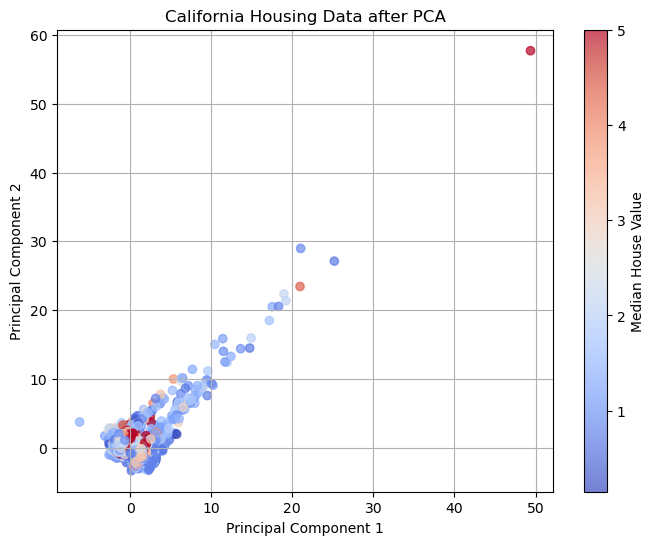

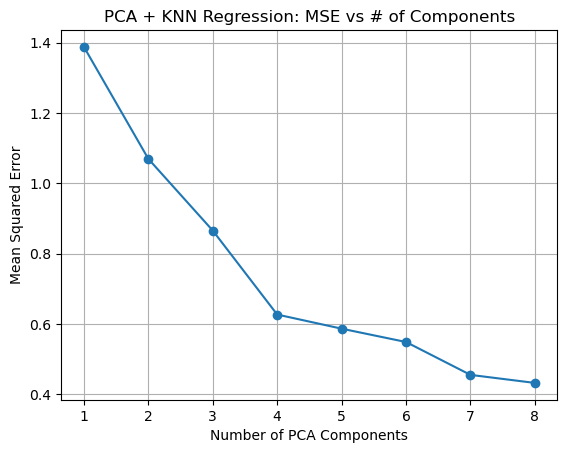

In [15]:
# ## 🧠 PCA + KNN Regression on California Housing Dataset
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("Explained variance ratio by components:", pca.explained_variance_ratio_)

# Train on PCA data
model_pca = KNeighborsRegressor(n_neighbors=5)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
print("MSE with PCA:", mean_squared_error(y_test, y_pred_pca))
print("R² Score with PCA:", r2_score(y_test, y_pred_pca))

# Visualize PCA components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label='Median House Value')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('California Housing Data after PCA')
plt.grid(True)
plt.show()

# Tune PCA components
components_range = range(1, 9)
mse_list = []
for n in components_range:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

plt.plot(components_range, mse_list, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Mean Squared Error")
plt.title("PCA + KNN Regression: MSE vs # of Components")
plt.grid(True)
plt.show()

## 🔍 Hyperparameter Tuning with GridSearchCV for KNN

In [20]:
# ## 🔍 Hyperparameter Tuning with GridSearchCV for KNN

from sklearn.model_selection import GridSearchCV

# Define parameter grid for KNN Regressor
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan (1) and Euclidean (2) distance
}

# Create GridSearchCV
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV MSE (negative):", grid_search.best_score_)

# Evaluate on test set using best model
best_knn = grid_search.best_estimator_
y_test_pred = best_knn.predict(X_test_scaled)
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R² Score:", r2_score(y_test, y_test_pred))

Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best CV MSE (negative): -0.3608964017272985
Test MSE: 0.36415064818946624
Test R² Score: 0.72210916268423
